1- Obtener el país con mayor cantidad de gente vacunada.

2- Realizar una visualización que permita comparar la cantidad de gente vacunada
(vaccinated), con la que recibió ambas dosis (fully vaccinated). Pueden tomar los 10 países con
mayor vacunación, ya sea en número como en porcentaje.

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

pd.options.display.float_format = '{:20,.2f}'.format
#%matplotlib inline

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Punto 1


A fin de lo pedido en el finger, voy a leer el .csv tomando solo las columnas de interes, para no desperdiciar memoria con datos que no voy a utilizar.

In [ ]:
vacunaciones_paises = pd.read_csv('/content/country_vaccinations.csv', usecols=\
                                  ['country','date','total_vaccinations',\
                                'people_vaccinated','people_fully_vaccinated'])

In [ ]:
vacunaciones_paises.sample(3)


,country,date,total_vaccinations,people_vaccinated,people_fully_vaccinated
4686,Hungary,2021-02-15,"473,551.00","341,958.00","131,593.00"
5579,Jamaica,2021-04-01,"41,901.00","41,901.00",nan
3083,Egypt,2021-01-27,nan,nan,nan


In [ ]:
vacunaciones_paises.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11681 entries, 0 to 11680
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   country                  11681 non-null  object 
 1   date                     11681 non-null  object 
 2   total_vaccinations       6945 non-null   float64
 3   people_vaccinated        6261 non-null   float64
 4   people_fully_vaccinated  4508 non-null   float64
dtypes: float64(3), object(2)
memory usage: 456.4+ KB


La columna 'total_vaccinations' es del tipo float64 y tiene 6945 valores no nulos. No voy a alterar el valores de los NaN que tenga en esa columna dado que a fin del calculo que quiero hacer no me afecta.

Segun los detalles del dataset en Kaggle, la columna 'total_vaccinations' puede tener un NaN debido a que, segun el pais, la informacion que se tiene es la cantidad de vacunas diarias aplicadas (en este caso tendriamos un NaN en la columna propiamente dicha) o un acumulado de las vacunaciones total del pais.

In [ ]:
cantTotal_vacunados_por_pais = vacunaciones_paises.loc[:,\
                      ['country','total_vaccinations']].groupby('country').max()
cantTotal_vacunados_por_pais.nlargest(1,'total_vaccinations')

,total_vaccinations
country,
United States,"194,791,836.00"


Como puede verse, el pais con mayor cantidad de vacunados es Estados Unidos, con un total de 194.791.836 vacunados.

# Punto 2

Para la segunda pregunta, tomo los primeros 10 paises con mayor cantidad de vacunados con ambas dosis.


In [ ]:
tipo_vacunados_agrupados_por_pais = vacunaciones_paises.groupby('country').max()
tipo_vacunados = tipo_vacunados_agrupados_por_pais.nlargest(10,\
                                                    'people_fully_vaccinated')

Realizo un grafico para ver la cantidad de dosis aplicadas segun pais, tomando los 10 paises que tengan la mayor cantidad de gente vacunada con ambas dosis. Voy a utilizar un 'grouped bar charts', dado que me parece la manera mas facil de visualizar, para cada pais, la cantidad de gente con n dosis aplicadas (siendo n=1 o n=2).

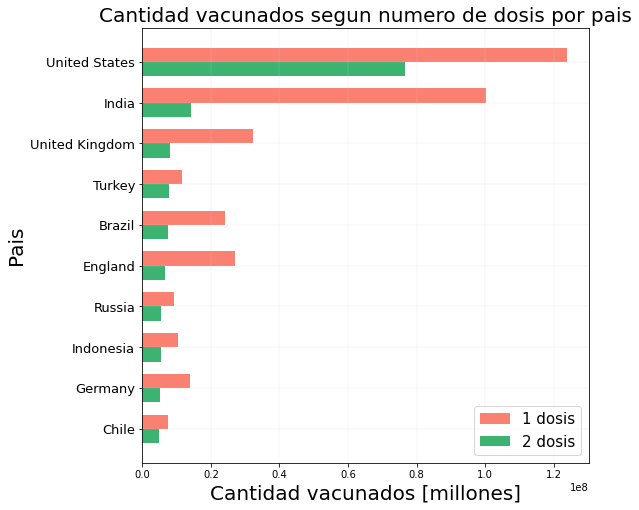

In [ ]:
x = np.arange(len(tipo_vacunados.index))
width = 0.35 

fig, ax = plt.subplots(figsize = (8,8))
rects1 = ax.barh(x - width/2, tipo_vacunados['people_vaccinated'],\
                 width, label='1 dosis', color = 'salmon')
rects2 = ax.barh(x + width/2, tipo_vacunados['people_fully_vaccinated'],\
                 width, label='2 dosis', color = 'mediumseagreen')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Pais', fontsize = 20)
ax.set_xlabel('Cantidad vacunados [millones]', fontsize = 20)
ax.set_title('Cantidad vacunados segun numero de dosis por pais', fontsize = 20)
ax.set_yticks(x)
ax.set_yticklabels(tipo_vacunados.index, fontsize = 13)
ax.legend(fontsize = 15)

plt.gca().invert_yaxis()
plt.grid(lw = 0.2, c = 'lightgray')
plt.show()